<a href="https://colab.research.google.com/github/Shreeranga1/LinearRegression/blob/main/ML2_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Presentation ML2- Team 2

DATASET

In [97]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [98]:
hf = pd.read_csv("https://raw.githubusercontent.com/Shreeranga1/LinearRegression/main/heart_failure_clinical_records_dataset.csv")

To be consistent with the feature description let's represent the platelets as kiloplatelets/mL

In [99]:
hf.platelets = hf.platelets/1000

In [100]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327,2.7,116,0,0,8,1


For brevity creatinine_phosphokinase will be renamed CPK.

In [101]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

Seperating Categorical variable and Numerical variable

In [102]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   diabetes             299 non-null    int64  
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    int64  
 5   platelets            299 non-null    float64
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    int64  
 9   smoking              299 non-null    int64  
 10  time                 299 non-null    int64  
 11  DEATH_EVENT          299 non-null    int64  
 12  CPK                  299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Feature distributions

We can see how features are distributed according to label.

In [103]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

Firstly we plot the numerical features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions

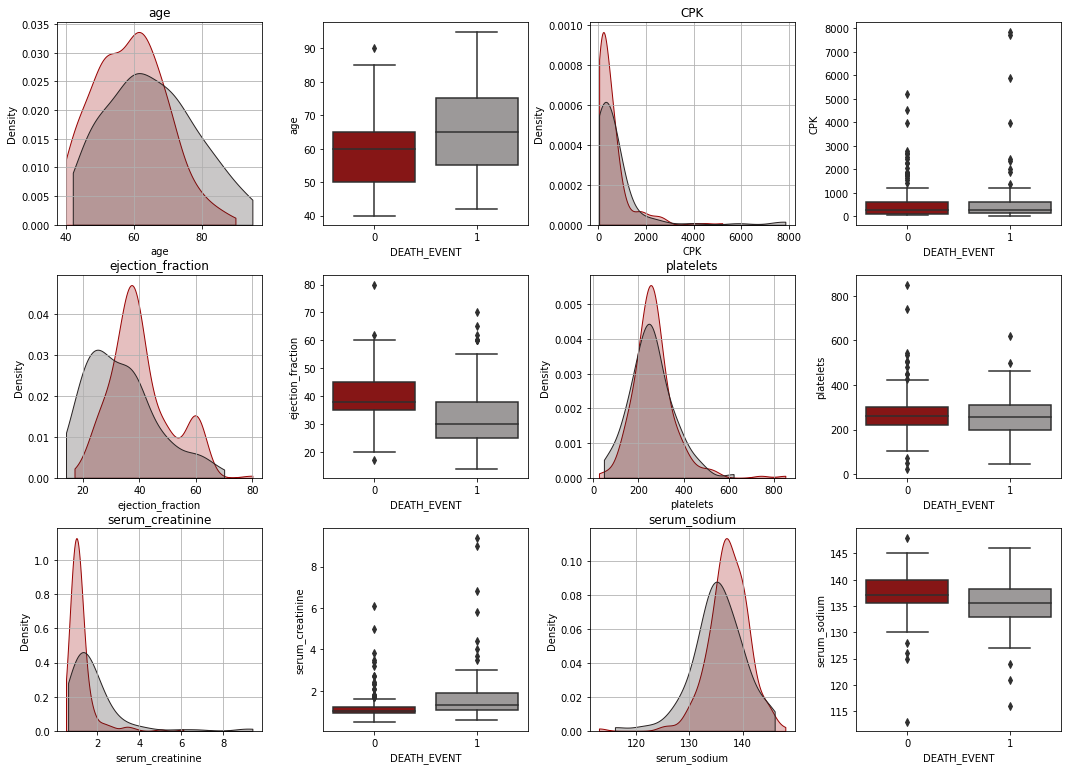

In [104]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])

Here are reported the categorical features

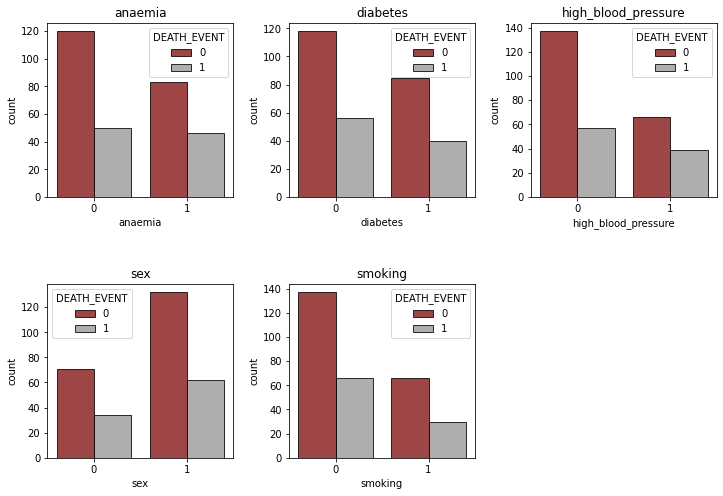

In [105]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

Standardization

In [106]:
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


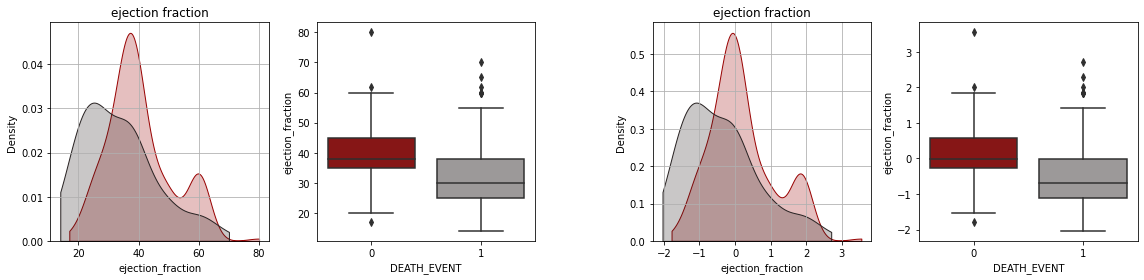

In [107]:
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])
    
plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1 ,0.1, 1, 1])
plt.subplot(gs[0])   
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[1]) 
sns.boxplot(y = "ejection_fraction", data = hf, x="DEATH_EVENT", palette = ["#990303", "#9C9999"])  
plt.subplot(gs[2])
#plt.imshow(mpimg.imread("img/right_arrow.png"))
plt.axis('off')
plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==0, "ejection_fraction"], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
sns.kdeplot(hf_norm.loc[hf["DEATH_EVENT"]==1, "ejection_fraction"], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
plt.subplot(gs[4])
sns.boxplot(y = "ejection_fraction", data = hf_norm, x="DEATH_EVENT", palette = ["#990303", "#9C9999"]);  
plt.tight_layout()

Correlation matrix 

In [108]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

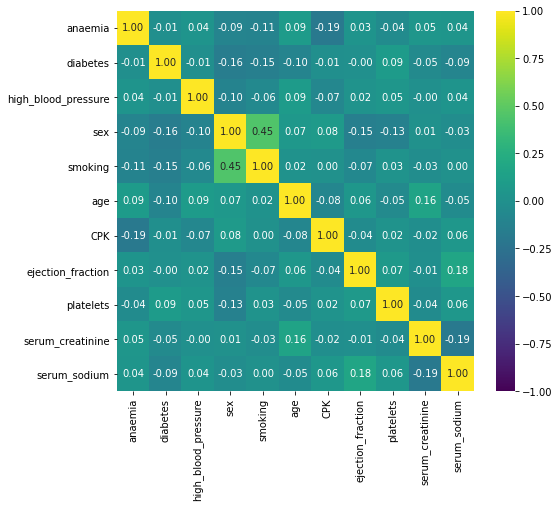

In [109]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

Normality assumptions

In [110]:
from scipy.stats import shapiro

#sw_df = pd.DataFrame(columns=["DEATH_EVENT=0", "DEATH_EVENT=1", "Both"])
index = [(feat, "statistic") for feat in numerical_features]
index.extend([(feat, "p-value") for feat in numerical_features])

index = pd.MultiIndex.from_tuples(index)

sw_df = pd.DataFrame(index=index,  columns = ["Both Classes", "DEATH_EVENT=0", "DEATH_EVENT=1"])

for feat in numerical_features:
    x = hf_norm[feat]
    stat, p = shapiro(x)
    
    sw_df["Both Classes"].loc[(feat, "statistic")] = stat
    sw_df["Both Classes"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==0, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=0"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=0"].loc[(feat, "p-value")] = p
    
    x = hf_norm.loc[hf["DEATH_EVENT"]==1, feat]
    stat, p = shapiro(x)
    sw_df["DEATH_EVENT=1"].loc[(feat, "statistic")] = stat
    sw_df["DEATH_EVENT=1"].loc[(feat, "p-value")] = p
    
sw_df = sw_df.unstack()

In [111]:
pd.set_option('display.float_format', '{:.3g}'.format)
sw_df

Both Classes            ... DEATH_EVENT=1          
                       p-value statistic  ...       p-value statistic
CPK                   7.05e-28     0.514  ...      1.99e-17     0.439
age                   5.35e-05     0.975  ...        0.0221     0.969
ejection_fraction     7.22e-09     0.947  ...      4.54e-05     0.927
platelets             2.88e-12     0.912  ...        0.0336     0.971
serum_creatinine      5.39e-27     0.551  ...      1.28e-14     0.608
serum_sodium          9.22e-10     0.939  ...       0.00384     0.958

[6 rows x 6 columns]

Validate the models

In [112]:
from sklearn.model_selection import train_test_split, StratifiedKFold

In [113]:
train_ratio = 0.75
val_ratio = 0.25

ho_train_df, ho_val_df = train_test_split(hf_norm, train_size = train_ratio, random_state=42)
unnorm_ho_train_df, unnorm_ho_val_df = train_test_split(hf, train_size = train_ratio, random_state=42)

print("Holdout split:")
print(f"Train samples: {len(ho_train_df)}")
print(f"Validation/Test samples: {len(ho_val_df)}")

Holdout split:
Train samples: 224
Validation/Test samples: 75


# Feature selection

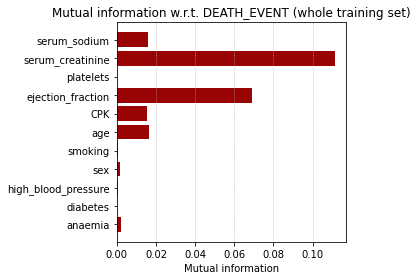

In [114]:
from sklearn.feature_selection import mutual_info_classif

    
MI = (mutual_info_classif(ho_train_df[all_features],
                             ho_train_df["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))

plt.figure(figsize=(5.4, 4))
plt.barh(y=all_features, width=MI, color="#990303")
plt.title("Mutual information w.r.t. DEATH_EVENT (whole training set)");
plt.xlabel("Mutual information")
plt.gca().xaxis.grid(True, linestyle=':');
plt.tight_layout();

Chi-squared test

In [115]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

print("Observed")
ctable = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
ctable.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
ctable.index = ["anaemia=0", "anaemia=1"]
ctable.loc["Total"] = ctable.sum()
ctable["Total"] = ctable.sum(axis=1)
ctable

Observed


,DEATH_EVENT=0,DEATH_EVENT=1,Total
anaemia=0,94,34,128
anaemia=1,65,31,96
Total,159,65,224


In [116]:
print("Expected")
contingency_table = pd.crosstab(ho_train_df["anaemia"], ho_train_df["DEATH_EVENT"])
stat, p, dof, expected = chi2_contingency(contingency_table)
expected = pd.DataFrame(expected)
expected.columns = ["DEATH_EVENT=0", "DEATH_EVENT=1"]
expected.index = ["anaemia=0", "anaemia=1"]
expected

Expected


,DEATH_EVENT=0,DEATH_EVENT=1
anaemia=0,90.9,37.1
anaemia=1,68.1,27.9


Now that we have the statistic we could compare it with a chi2 distribution with those given degrees of freedom, fixing an alpha value and keeping only the features that produce a lower p-value (rejected).

In [117]:
def chi2_test(df, feat1, feat2):

    contingency_table = pd.crosstab(df[feat1], df[feat2])
    
    stat, p, dof, expected = chi2_contingency(contingency_table)
    prob = 0.95 # alpha=0.05
    critical = chi2.ppf(prob, dof)
    #print('alpha=%.3f, critical_value=%.3f,\nstat=%.3f' % (1 - prob, critical, stat))

    # interpret p-value
    alpha = 1.0 - prob
    
    return stat, p

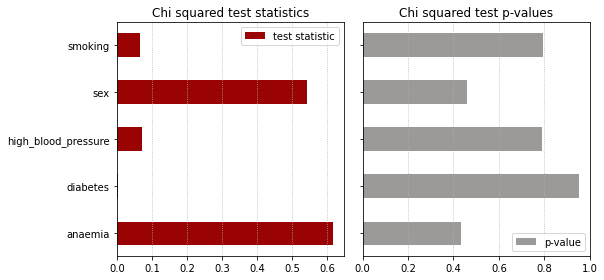

In [118]:
stats = []
p_values = []

for feat in categorical_features:
        
    stat, p = chi2_test(ho_train_df, feat, "DEATH_EVENT")
    stats.append(stat)
    p_values.append(p)        

fig, axes = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(8.5, 4)
axes[0].barh(y=categorical_features, width=stats, color="#990303", label="test statistic", height=0.5)
axes[0].set_title("Chi squared test statistics")

axes[1].barh(y=categorical_features, width=p_values, color="#9C9999", label="p-value", height=0.5)
axes[1].set_title("Chi squared test p-values")

axes[0].xaxis.grid(True, linestyle=':');
axes[1].xaxis.grid(True, linestyle=':');

axes[0].legend(loc=1)
axes[1].legend(loc=4)

fig.subplots_adjust(wspace=0.06)
plt.tight_layout()

KFold case

In [119]:
kfold_train_df, kfold_val_df = ho_train_df.copy(), ho_val_df.copy()

all_features = ['anaemia', 'sex', 'age', 'CPK',
                'ejection_fraction', 'serum_creatinine', 'serum_sodium']


Mutual information with respect to DEATH_EVENT (5 folds)


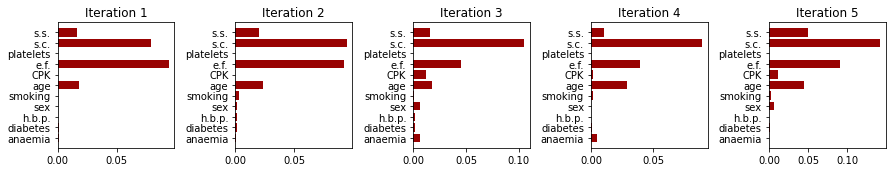

In [120]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(12.5, 2.5))

print("Mutual information with respect to DEATH_EVENT (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    MI=(mutual_info_classif(kfold_train_df.iloc[train_idx][categorical_features+numerical_features],
                             kfold_train_df.iloc[train_idx]["DEATH_EVENT"], n_neighbors=20,
                             discrete_features=[True, True, True, True, True, False, False, False, False, False, False],
                             random_state=42))
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.','sex', 'smoking', 'age', 'CPK', 'e.f.', 'platelets',
         's.c.', 's.s.'], width=MI, color="#990303", label="test statistic")
    
plt.tight_layout()

Chi squared test statistics (5 folds)


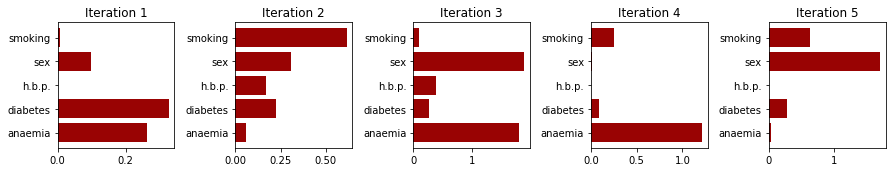

In [121]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(12.5, 2.5))
print("Chi squared test statistics (5 folds)")
for i, (train_idx, val_idx) in enumerate(kf.split(kfold_train_df, kfold_train_df["DEATH_EVENT"])):
    stats = []
    p_values = []

    for feat in categorical_features:

        stat, p = chi2_test(kfold_train_df.iloc[train_idx], feat, "DEATH_EVENT")
        stats.append(stat)
        p_values.append(p)
    
    plt.subplot(1, 5, i+1)
    plt.title(f"Iteration {i+1}")
    plt.barh(y=['anaemia', 'diabetes', 'h.b.p.', 'sex', 'smoking'], width=stats, color="#990303", label="test statistic")
plt.tight_layout()

In [122]:
numerical_features = ['age', 'CPK', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']
all_features_kfold = [
    ["anaemia", "diabetes"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
    ["anaemia", "sex"]+numerical_features,
    ["anaemia", "smoking"]+numerical_features,
    ["sex", "smoking"]+numerical_features,
]

Class imbalance

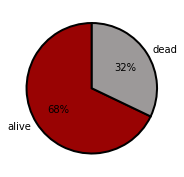

In [123]:
plt.figure(figsize=(3, 3))
plt.pie(hf["DEATH_EVENT"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["#990303", "#9C9999"], 
        wedgeprops={'edgecolor':'black', 'linewidth': 2}, 
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

Random oversampling

In [124]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = ho_train_df[ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)

ho_train_df_rs = ho_train_df.append(new_samples)

new_samples = unnorm_ho_train_df[unnorm_ho_train_df.DEATH_EVENT==1].sample(n_to_sample, replace=True, random_state=42)
unnorm_ho_train_df_rs = unnorm_ho_train_df.append(new_samples)

Here we can see the distribution of ejection_fraction for only under-represented class samples before and after oversampling. (the line is a kde)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


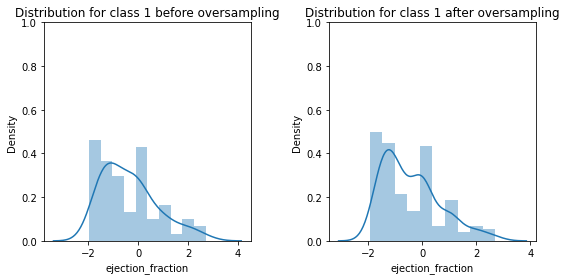

In [125]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before oversampling")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after oversampling")
sns.distplot(ho_train_df_rs[ho_train_df_rs.DEATH_EVENT==1].ejection_fraction, bins=nbins);
plt.tight_layout()

Smote

In [126]:
def rand_jitter(arr):
    np.random.seed(42)
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [127]:
norm = np.linalg.norm
import random
from random import sample 

def SMOTE(data, sampling_rate, n_neigh, random_state=42):
    random.seed(random_state)
    new_samples = []
    
    if sampling_rate==0:
        return
    
    if sampling_rate>n_neigh: return      
    data = data.reset_index(drop=True)

    n_samples = data.count()[0]

    for i in range(n_samples):
        dists = []
        for j in range(n_samples):
            if i==j: continue
            dists.append((j, norm(data.loc[i]-data.loc[j])))    
        
        topk = sorted(dists, key=lambda s: s[1])[:n_neigh]
        neighs = sample(topk, sampling_rate)

        for neigh in neighs:
            alpha = random.random()
            new_samples.append(data.loc[i] + alpha * (data.loc[neigh[0]]-data.loc[i]))
            
    return new_samples

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


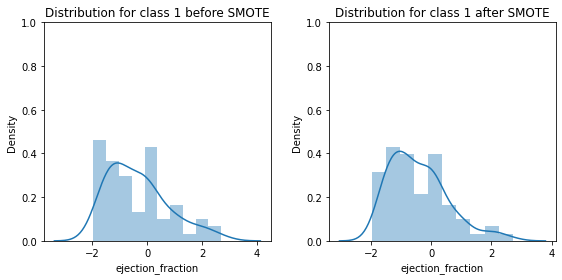

In [128]:
nbins = 10
plt.figure(figsize = (8, 4))

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Distribution for class 1 before SMOTE")
sns.distplot(ho_train_df[ho_train_df.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("Distribution for class 1 after SMOTE")
sns.distplot(ho_train_df_sm[ho_train_df_sm.DEATH_EVENT==1].ejection_fraction, bins=nbins)
plt.tight_layout();

In [129]:
n_to_sample = len(ho_train_df[ho_train_df.DEATH_EVENT==0]) - len(ho_train_df[ho_train_df.DEATH_EVENT==1])
new_samples = SMOTE(ho_train_df[ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

ho_train_df_sm = ho_train_df.append(new_samples)
ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)


new_samples = SMOTE(unnorm_ho_train_df[unnorm_ho_train_df["DEATH_EVENT"]==1][all_features],
                    sampling_rate = 1, n_neigh = 50)

# categorical attributes need to be fixed
for s in new_samples:
    s["anaemia"] = np.round(s["anaemia"])
    s["sex"] = np.round(s["sex"])

unnorm_ho_train_df_sm = unnorm_ho_train_df.append(new_samples)
unnorm_ho_train_df_sm["DEATH_EVENT"].fillna(1, inplace=True)

# Logistic Regression

In [168]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [169]:
c = 1
penalty = "l2"
solver = "liblinear"
multi_class = "auto"
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

## Firstly lets go random sampling data rs=Random_Sample (Print out sample training data)

In [170]:
ho_train_df_rs[all_features][1:5]

,anaemia,sex,age,CPK,ejection_fraction,serum_creatinine,serum_sodium
78,1,1,1.19,-0.391,-0.00708,-0.769,-1.28
66,1,0,-1.59,-0.343,-1.95,-0.0909,-0.142
296,0,0,-1.33,1.53,1.85,-0.575,0.312
192,1,1,-0.912,-0.476,0.162,-0.672,-1.5


Print out test data

In [171]:
ho_train_df_rs['DEATH_EVENT'][1:5]

78     0
66     1
296    0
192    0
Name: DEATH_EVENT, dtype: int64

In [172]:
lr.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
ho_val_df[all_features][1:3]

,anaemia,sex,age,CPK,ejection_fraction,serum_creatinine,serum_sodium
265,1,1,-0.912,-0.293,-0.261,-0.478,0.766
164,0,1,-1.33,1.92,-0.684,-0.285,0.539


In [174]:
pred = lr.predict(ho_val_df[all_features])

In [175]:
raw_pred_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

In [176]:
pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1])

now let us check the accuracy,f1_score,recall_score and precision score

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import roc_curve

Accuracy=correct_predictions / total_predictions

In [178]:
rs_acc=accuracy_score(ho_val_df['DEATH_EVENT'],pred)
print(rs_acc)

0.7066666666666667


In [179]:
rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_rec)

0.6451612903225806


In [180]:
rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_pre)

0.6451612903225806


In [181]:
rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
print(rs_f1)

0.6451612903225806


In [182]:
Logistic_regression_data={"Col":['Accuracy','Recall','Precision','F1'],"RandomSampling":[rs_acc,rs_acc,rs_pre,rs_f1]}
Logistic_regression_data=pd.DataFrame.from_dict(Logistic_regression_data)

In [183]:
Logistic_regression_data

,Col,RandomSampling
0,Accuracy,0.707
1,Recall,0.707
2,Precision,0.645
3,F1,0.645


## now lets check the logisctic regression on Smote train and test data

In [184]:
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

Lets check how the smote data looks 

In [185]:
ho_train_df_sm[all_features][0:4]

,anaemia,sex,age,CPK,ejection_fraction,serum_creatinine,serum_sodium
225,0,0,1.19,0.0962,1.85,0.00593,-2.64
78,1,1,1.19,-0.391,-0.00708,-0.769,-1.28
66,1,0,-1.59,-0.343,-1.95,-0.0909,-0.142
296,0,0,-1.33,1.53,1.85,-0.575,0.312


In [186]:
ho_train_df_sm['DEATH_EVENT'][0:4]

225   0
78    0
66    1
296   0
Name: DEATH_EVENT, dtype: float64

In [187]:
ho_train_df_sm['DEATH_EVENT'].value_counts()

0    159
1    130
Name: DEATH_EVENT, dtype: int64

In [188]:
ho_val_df['DEATH_EVENT'].value_counts()

0    44
1    31
Name: DEATH_EVENT, dtype: int64

In [189]:
lr.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
pred = lr.predict(ho_val_df[all_features])
raw_pred_sm = lr.predict_proba(ho_val_df[all_features])[:, 1]

accuracy,f1_score,recall_score and precision score for SMOTE data 

In [191]:
sm_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
sm_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
sm_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
sm_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))
print(sm_acc)
print(sm_rec)
print(sm_pre)
print(sm_f1)

0.7333333333333333
0.6451612903225806
0.6896551724137931
0.6666666666666667


In [192]:
df2=pd.DataFrame.from_dict({'Smote_results':[sm_acc,sm_rec,sm_pre,sm_f1]})
Logistic_regression_data=pd.concat([Logistic_regression_data,df2],axis=1)
Logistic_regression_data

,Col,RandomSampling,Smote_results
0,Accuracy,0.707,0.733
1,Recall,0.707,0.645
2,Precision,0.645,0.69
3,F1,0.645,0.667


## Now lets check for non over sampled 

In [193]:
lr = LogisticRegression(penalty=penalty, C=c, fit_intercept=True, class_weight=None,
                   random_state=42, solver=solver, multi_class=multi_class)

lr.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT'])
pred = lr.predict(ho_val_df[all_features])
raw_pred_no_rs = lr.predict_proba(ho_val_df[all_features])[:, 1]

In [194]:
no_rs_acc=(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_rec=(recall_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_pre=(precision_score(ho_val_df["DEATH_EVENT"], pred))
no_rs_f1=(f1_score(ho_val_df["DEATH_EVENT"], pred))

In [195]:
df3=pd.DataFrame.from_dict({'Smote_results':[no_rs_acc,no_rs_rec,no_rs_pre,no_rs_f1]})
Logistic_regression_data=pd.concat([Logistic_regression_data,df3],axis=1)
Logistic_regression_data

,Col,RandomSampling,Smote_results,Smote_results
0,Accuracy,0.707,0.733,0.667
1,Recall,0.707,0.645,0.323
2,Precision,0.645,0.69,0.714
3,F1,0.645,0.667,0.444


In [196]:
fpr_rs, tpr_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_rs)
fpr_no_rs, tpr_no_rs, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_no_rs)
fpr_sm, tpr_sm, thresholds = roc_curve(ho_val_df["DEATH_EVENT"], raw_pred_sm)

In [197]:
def roc_area(tpr, fpr):
    area = 0
    for i in range(len(tpr)-1):
        base = fpr[i+1]-fpr[i]
        h = tpr[i]
        area += base*h
        
    return round(area, 3)

Lets create ROC_Area

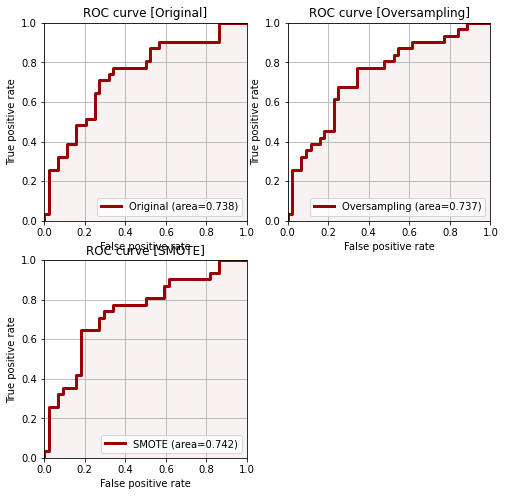

In [198]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(fpr_no_rs, tpr_no_rs, label=f"Original (area={roc_area(tpr_no_rs, fpr_no_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Original]")
plt.fill_between(fpr_no_rs, 0, tpr_no_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 2)
plt.plot(fpr_rs, tpr_rs, label=f"Oversampling (area={roc_area(tpr_rs, fpr_rs)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [Oversampling]")
plt.fill_between(fpr_rs, 0, tpr_rs, alpha=0.05, color='#990303')

plt.subplot(2, 2, 3)
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (area={roc_area(tpr_sm, fpr_sm)})", linewidth=3, color='#990303')
plt.grid()
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.legend(loc=4)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve [SMOTE]")
plt.fill_between(fpr_sm, 0, tpr_sm, alpha=0.05, color='#990303')

# K Nearest Neighbors

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
n_neigh = range(1, 21, 2)
n = len(n_neigh)

In [201]:
rs_acc, rs_rec, rs_pre, rs_f1 = [], [], [], []
sm_acc, sm_rec, sm_pre, sm_f1 = [], [], [], []
no_rs_acc, no_rs_rec, no_rs_pre, no_rs_f1 = [], [], [], []
rs_raw_pred, sm_raw_pred, no_rs_raw_pred = [], [], []
metric = "minkowski"

In [202]:
for i,n in enumerate(n_neigh):
       
    # oversampling
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df_rs[all_features], ho_train_df_rs['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    rs_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    rs_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    rs_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    rs_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    rs_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))

    

    # SMOTE
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df_sm[all_features], ho_train_df_sm['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    sm_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    sm_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    sm_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    sm_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    sm_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))
        
    #no oversampling
    knn = KNeighborsClassifier(n, weights="uniform", metric=metric, p=2)
    knn.fit(ho_train_df[all_features], ho_train_df['DEATH_EVENT']);
    pred = knn.predict_proba(ho_val_df[all_features]);
    pred=pred[:, 1]
    no_rs_raw_pred.append(pred.copy())
    pred[pred>=0.5]=1
    pred[pred<0.5]=0
        
    no_rs_acc.append(accuracy_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_rec.append(recall_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_pre.append(precision_score(ho_val_df["DEATH_EVENT"], pred))
    no_rs_f1.append(f1_score(ho_val_df["DEATH_EVENT"], pred))

K-Fold cross-validation metrics (5 folds)


Text(0.5, 1.0, 'Accuracy')

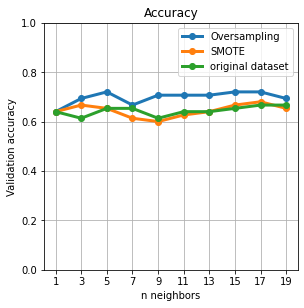

In [203]:
print("K-Fold cross-validation metrics (5 folds)")
plt.figure(figsize=(10, 10))

# accuracy
plt.subplot(2, 2, 1)    
plt.plot(list(n_neigh), rs_acc, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_acc, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_acc, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)




plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation accuracy")
plt.xlabel("n neighbors")
plt.title("Accuracy")

Text(0.5, 1.0, 'Precision')

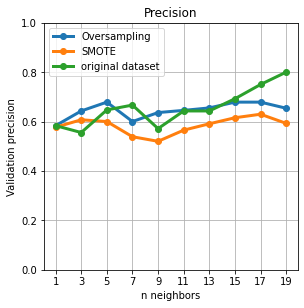

In [204]:
# precision
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)   
plt.plot(list(n_neigh), rs_pre, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_pre, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_pre, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation precision")
plt.xlabel("n neighbors")
plt.title("Precision")


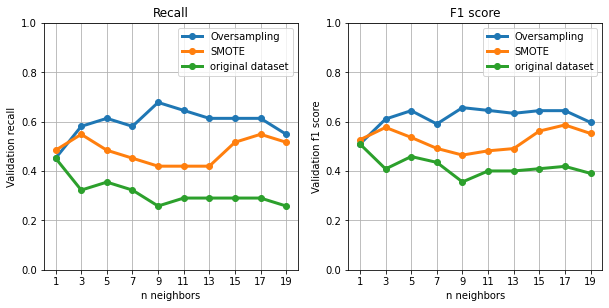

In [205]:
# recall
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)    
plt.plot(list(n_neigh), rs_rec, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_rec, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_rec, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation recall")
plt.xlabel("n neighbors")
plt.title("Recall")

# f1 score
plt.subplot(2, 2, 4)    
plt.plot(list(n_neigh), rs_f1, label="Oversampling", marker='o', linewidth=3)
plt.plot(list(n_neigh), sm_f1, label="SMOTE", marker='o', linewidth=3)
plt.plot(list(n_neigh), no_rs_f1, label = "original dataset", marker='o', linewidth=3)
plt.xticks(n_neigh)

plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.ylabel("Validation f1 score")
plt.xlabel("n neighbors")
plt.title("F1 score");
